In [ ]:
                                                    Zomato Restaurant
Project Overview
The Zomato Restaurant Data Analysis project aims to provide insights into restaurants across different countries and cities. 
It helps food enthusiasts discover the best cuisines within their budget, identify value-for-money restaurants, and find 
localities with a high concentration of specific cuisines. The analysis utilizes data from Zomato, a popular restaurant 
discovery platform.

Zomato Data Shape: (9551, 21)
Country Data Shape: (15, 2)
Merged Data Shape: (9551, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null

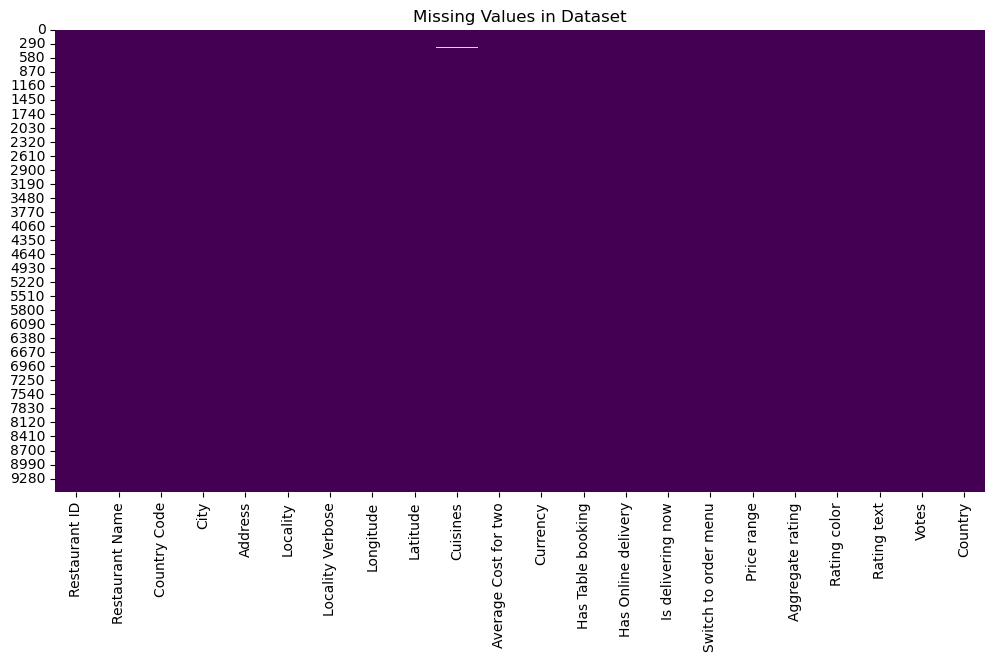

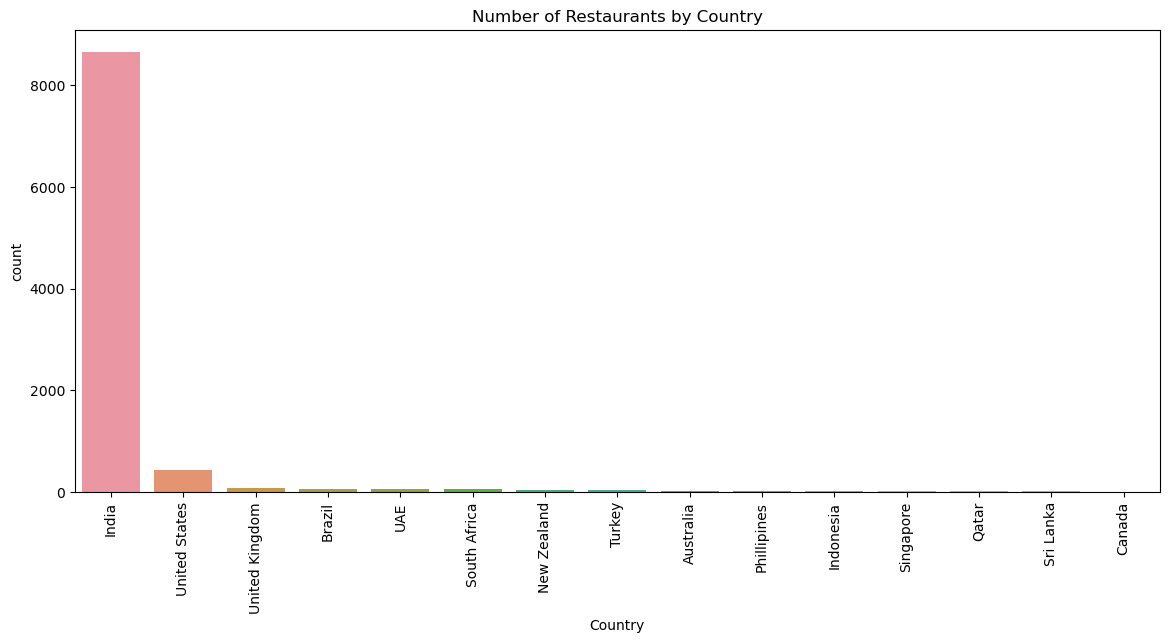

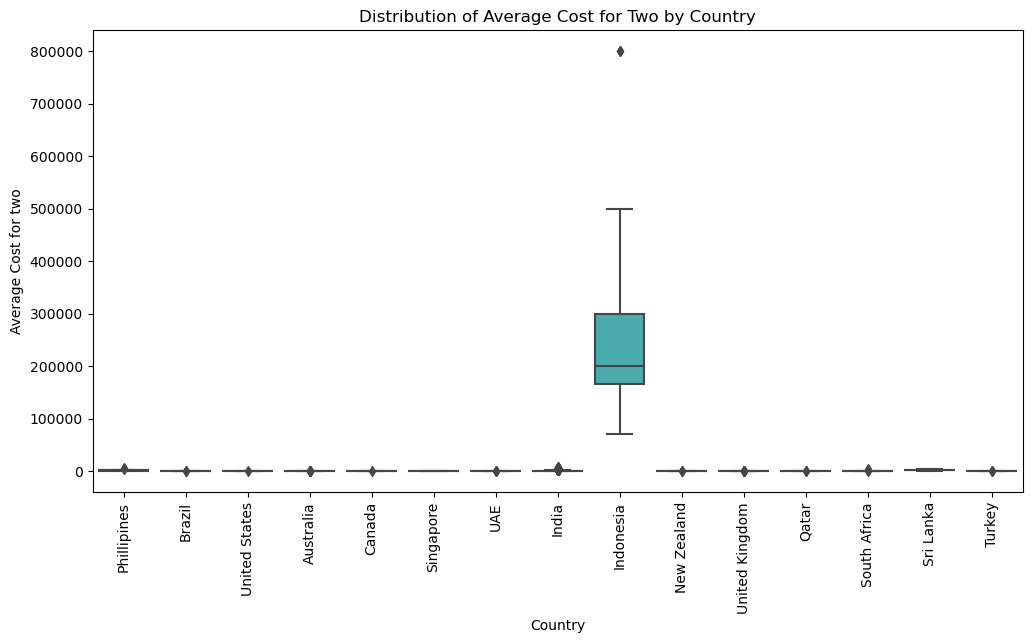

Mean Squared Error: 264359739.9490838
R-squared Score: 0.020240439576547087
Ridge Regression - Mean Squared Error: 264358075.84267768
Ridge Regression - R-squared Score: 0.020246607021564555
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1333
           2       1.00      1.00      1.00       937
           3       1.00      1.00      1.00       405
           4       1.00      1.00      1.00       191

    accuracy                           1.00      2866
   macro avg       1.00      1.00      1.00      2866
weighted avg       1.00      1.00      1.00      2866

Accuracy: 1.0
Models saved successfully!


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score
import warnings
import pickle

# Suppress warnings
warnings.filterwarnings('ignore')

# Step 1: Load Datasets with appropriate encoding
# Specify encoding='ISO-8859-1' to handle special characters

# Correct URLs for the datasets
zomato_url = "https://github.com/dsrscientist/dataset4/raw/main/zomato.csv"
country_url = "https://github.com/dsrscientist/dataset4/raw/main/Country-Code.xlsx"

# Use appropriate encoding and direct download link for Excel file
zomato_data = pd.read_csv(zomato_url, encoding='ISO-8859-1')
country_data = pd.read_excel(country_url)

# Display loaded data
print("Zomato Data Shape:", zomato_data.shape)
print("Country Data Shape:", country_data.shape)

# Step 2: Merge Datasets on 'Country Code'
merged_data = pd.merge(zomato_data, country_data, on='Country Code', how='left')
print("Merged Data Shape:", merged_data.shape)
print(merged_data.info())

# Step 3: Exploratory Data Analysis (EDA)
# Check for missing values
print("Missing values in each column:\n", merged_data.isnull().sum())

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(merged_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Dataset")
plt.show()

# Visualize restaurant ratings across different countries
plt.figure(figsize=(14, 6))
sns.countplot(x='Country', data=merged_data, order=merged_data['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Restaurants by Country')
plt.show()

# Distribution of 'Average Cost for Two' across countries
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Average Cost for two', data=merged_data)
plt.xticks(rotation=90)
plt.title('Distribution of Average Cost for Two by Country')
plt.show()

# Step 4: Data Preprocessing
# Handle missing values - Filling missing values in Cuisines with 'Unknown'
merged_data['Cuisines'].fillna('Unknown', inplace=True)

# Dropping columns with many missing values (if any)
merged_data = merged_data.dropna(axis=1, thresh=len(merged_data)*0.5)  # Drop columns if more than 50% values are missing

# Encoding categorical variables
label_encoder = LabelEncoder()
merged_data['Has Table booking'] = label_encoder.fit_transform(merged_data['Has Table booking'])
merged_data['Has Online delivery'] = label_encoder.fit_transform(merged_data['Has Online delivery'])
merged_data['Is delivering now'] = label_encoder.fit_transform(merged_data['Is delivering now'])
merged_data['Switch to order menu'] = label_encoder.fit_transform(merged_data['Switch to order menu'])
merged_data['Country'] = label_encoder.fit_transform(merged_data['Country'])

# Convert categorical 'Currency' to numerical codes
merged_data['Currency'] = label_encoder.fit_transform(merged_data['Currency'])

# Step 5: Feature Selection and Train-Test Split
features = ['Country', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu',
            'Votes', 'Aggregate rating', 'Currency', 'Latitude', 'Longitude', 'Price range']

# Features and target variables
X = merged_data[features]
y_cost = merged_data['Average Cost for two']  # Target for regression
y_price = merged_data['Price range']  # Target for classification

# Split the data into training and testing sets
X_train_cost, X_test_cost, y_train_cost, y_test_cost = train_test_split(X, y_cost, test_size=0.3, random_state=42)
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X, y_price, test_size=0.3, random_state=42)

# Step 6: Model Building
# 6.1 Predicting Average Cost for Two (Regression)
# Standardize the features for regression
scaler = StandardScaler()
X_train_cost = scaler.fit_transform(X_train_cost)
X_test_cost = scaler.transform(X_test_cost)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_cost, y_train_cost)

# Model Evaluation - Regression
y_pred_cost = lr_model.predict(X_test_cost)
print("Mean Squared Error:", mean_squared_error(y_test_cost, y_pred_cost))
print("R-squared Score:", r2_score(y_test_cost, y_pred_cost))

# Ridge Regression (Regularization)
ridge_model = Ridge()
ridge_model.fit(X_train_cost, y_train_cost)

# Model Evaluation - Ridge Regression
y_pred_ridge_cost = ridge_model.predict(X_test_cost)
print("Ridge Regression - Mean Squared Error:", mean_squared_error(y_test_cost, y_pred_ridge_cost))
print("Ridge Regression - R-squared Score:", r2_score(y_test_cost, y_pred_ridge_cost))

# 6.2 Predicting Price Range (Classification)
# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_price, y_train_price)

# Model Evaluation - Classification
y_pred_price = rf_classifier.predict(X_test_price)
print("Classification Report:\n", classification_report(y_test_price, y_pred_price))
print("Accuracy:", accuracy_score(y_test_price, y_pred_price))

# Step 7: Save the models using pickle
# Save the linear regression model for cost prediction
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

# Save the random forest classifier for price range prediction
with open('random_forest_classifier.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

print("Models saved successfully!")


In [ ]:
Steps
Load Datasets: Read the Zomato and Country-Code datasets from URLs.
Merge Datasets: Combine the two datasets on the 'Country Code'.
Exploratory Data Analysis (EDA):
Check for missing values and visualize them.
Visualize the distribution of restaurants by country and the average cost for two.
Data Preprocessing:
Handle missing values and drop columns with excessive missing data.
Encode categorical variables using LabelEncoder.
Feature Selection and Train-Test Split: Select relevant features and split the dataset into training and testing sets.
Model Building:
Regression: Build a Linear Regression and Ridge Regression model to predict the average cost for two.
Classification: Use a Random Forest Classifier to predict the price range.
Model Evaluation: Assess model performance using metrics like Mean Squared Error (MSE) and accuracy score.
Save Models: Serialize trained models using pickle for future use.
Usage
Ensure the required libraries are installed.
Run the script in a Python environment with internet access to fetch the datasets.
The trained models will be saved as linear_regression_model.pkl and random_forest_classifier.pkl.
